[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


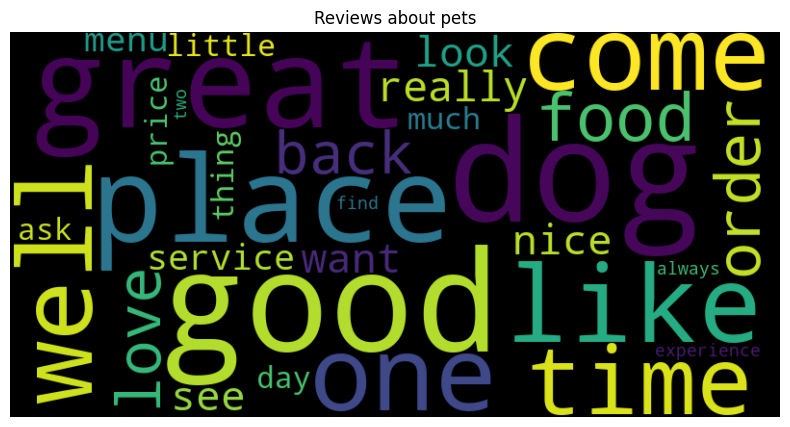

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import polars as pl

nltk.download('stopwords')

#df = pl.read_csv("../data/processed/data_pet_booking.csv")
df = pl.read_csv("../data/processed/data_pet_yelp.csv")
# --- 1. Exemple de corpus de reviews ---
reviews = df.select("text").to_series().to_list()

# --- 2. Combiner toutes les reviews en une seule chaîne ---
text = " ".join(reviews)

# --- 3. Définir les mots à ignorer (stopwords) ---
stop_words = set(stopwords.words('english'))

# Add supplementary words
custom_stopwords = {"get", "could", "take", "know", "make", "go", "give", "would", "also", "even", "say", "try"}
stop_words.update(custom_stopwords)

# --- 4. Créer le Word Cloud ---
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      max_words=30).generate(text)

# --- 5. Afficher le Word Cloud ---
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reviews about pets")
plt.show()


In [1]:
import torch
print(torch.__version__)

2.9.0+cpu


In [2]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

c:\Users\emma\Desktop\project\large-project\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\emma\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [12]:
import torch
from transformers import pipeline
import polars as pl

# Charger un modèle adapté (RoBERTa est très bon ici)
pipe = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)

# Tes labels
labels = ["pet", "child", "handicap", "other"]

# Exemple de reviews
df = pl.read_csv("../data/processed/data_handicap_booking.csv")
# --- 1. Exemple de corpus de reviews ---
reviews = df.select("review_negative").head(5).to_series().to_list()

# Classification
for r in reviews:
    result = pipe(r, candidate_labels=labels, multi_label=False)
    print(f"\nTexte : {r}")
    print(f"→ Catégorie prédite : {result['labels'][0]} (score={result['scores'][0]:.3f})")


Device set to use cpu



Texte : variety of option on dinner menu be repetitive , but tasty and well do . would prefer more salad option .
→ Catégorie prédite : other (score=0.532)

Texte : it could&#39;ve be well if they have free breakfast . my partner didn&#39;t enjoy his breakfast as he get serve with fatty bacon . no elevator . although we didn&#39;t mind that they don&#39;t have elevator , there be a time when we wish they have after hour of activity outside and go up the stair be exhausting . no hand and face towel . but those be only minor thing . we would still come back to this place .
→ Catégorie prédite : handicap (score=0.639)

Texte : the boxed breakfast could be improve
→ Catégorie prédite : other (score=0.466)

Texte : everything be great . it would have be good to have an elevator for heavy bag but not a big issue give all the other thing that be wonderful
→ Catégorie prédite : other (score=0.826)

Texte : only 1 lift work so have to wait long than usual .
→ Catégorie prédite : handicap (scor